In [48]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [118]:
def imread_gs(path: str) -> np.ndarray:
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


def crop(img: np.ndarray,
         x_params: tuple[int, int] = (X_START, X_END),
         y_params: tuple[int, int] = (Y_START, Y_END)
        ) -> np.ndarray:
    return img[y_params[0]:y_params[1], x_params[0]:x_params[1]]


def show(img: np.ndarray) -> None:
    plt.figure(figsize=(20, 20))
    plt.imshow(img, cmap='gray')

In [119]:
pmma_img = imread_gs('data/pmma_192648.tif')
benzo_img = imread_gs('data/benzoic1000msgain_193519.tif')

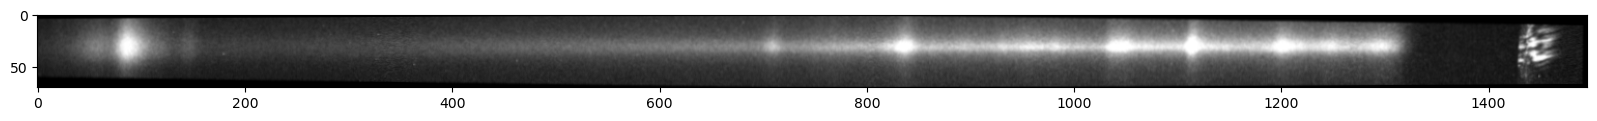

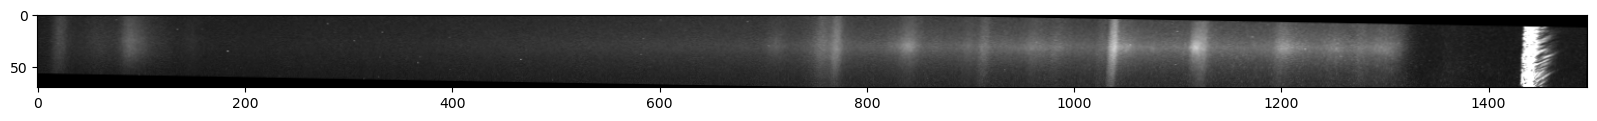

In [120]:
show(pmma_img)
show(benzo_img)

In [57]:
pmma_img.shape

(70, 1496)

In [94]:
benzo_img.shape

(70, 1496)

In [79]:
Y_START, Y_END = 25, 35
X_START, X_END = 0, 1315

In [95]:
pmma_cropped = crop(pmma_img)
benzo_cropped = crop(benzo_img)

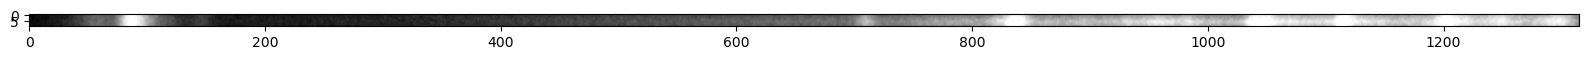

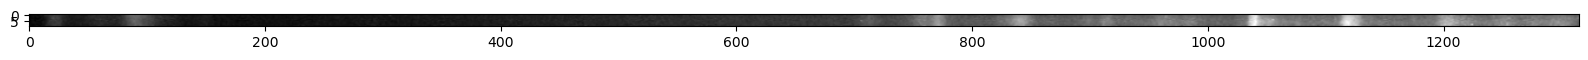

In [96]:
show(pmma_cropped)
show(benzo_cropped)

In [128]:
pmma_spec = pmma_cropped.sum(axis=0, dtype=np.int64)
benzo_spec = benzo_cropped.sum(axis=0, dtype=np.int64)

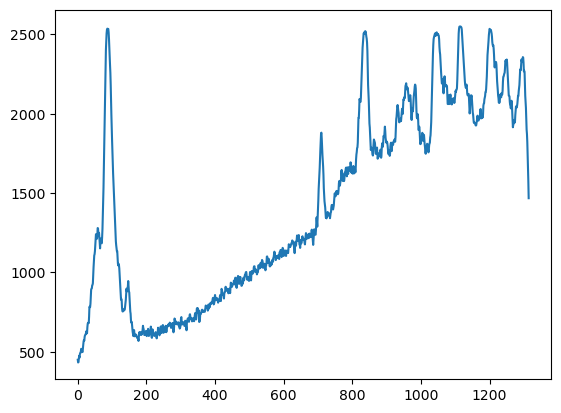

In [129]:
plt.plot(pmma_spec)

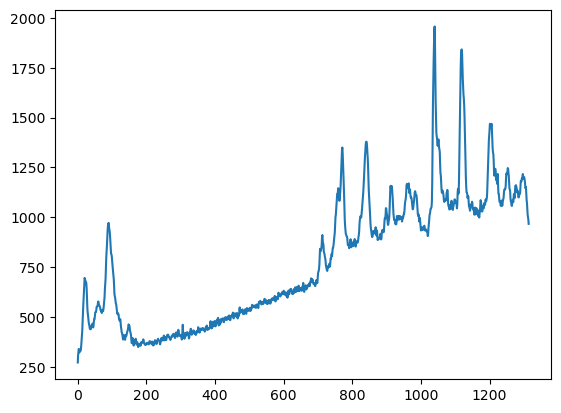

In [130]:
plt.plot(benzo_spec)

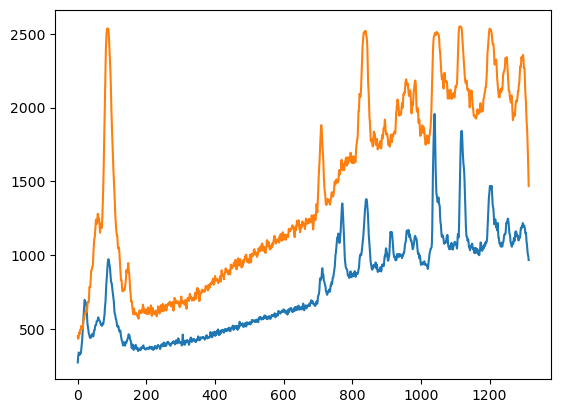

In [133]:
plt.plot(benzo_spec)
plt.plot(pmma_spec)

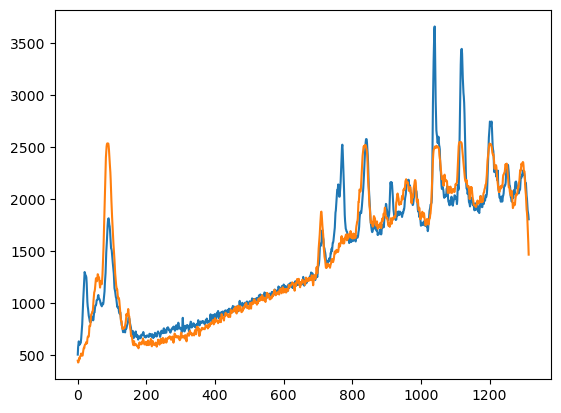

In [127]:
plt.plot(benzo_spec * pmma_spec[400]/benzo_spec[400])
plt.plot(pmma_spec)

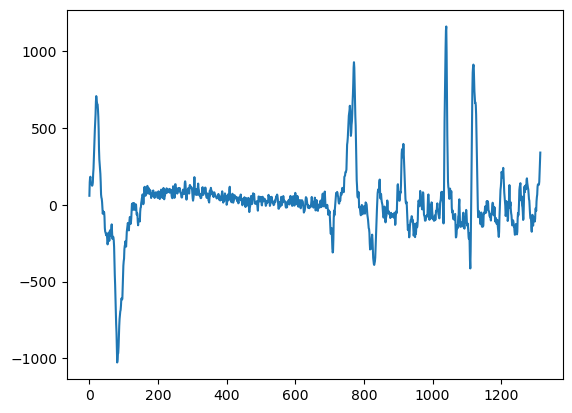

In [132]:
plt.plot(benzo_spec * pmma_spec[400]/benzo_spec[400] - pmma_spec)

In [139]:
def readline(line: str) -> tuple[float, float]:
    x, y = line.split('  ')
    return (float(x), float(y))

In [140]:
with open('data/benzoic acid reference.txt') as f:
    benzo_ref = [ readline(l) for l in f.readlines() ]

In [144]:
wvns, vals = np.array(benzo_ref).transpose()

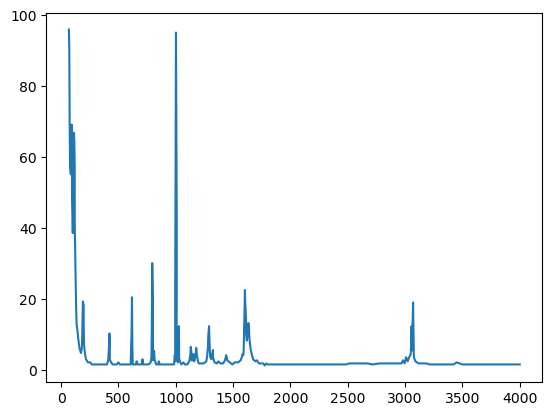

In [145]:
plt.plot(wvns, vals)